In [15]:
import pandas as pd
import numpy as np
#Loading csv
try:
 # File
    DF_mlb = pd.read_csv('mlb-player-stats-Batters.csv')

 # Displaying some initaialinformation  
    print("First 5 rows of the DataFrame:")
    print(DF_mlb.head())
    print("-" * 50)

    #If an error occurs, I will be notified.
except Exception as e:
    print(f"Error: {e}")

First 5 rows of the DataFrame:
             Player Team Pos  Age    G   AB    R    H  2B  3B  ...  CS  BB  \
0   Julio Rodriguez  SEA  OF   24  160  652  106  174  31   4  ...   6  44   
1  Francisco Lindor  NYM  SS   32  160  644  117  172  35   0  ...   6  65   
2   Elly De La Cruz  CIN  SS   23  162  629  102  166  31   7  ...   8  67   
3      Brent Rooker  ATH  OF   31  162  626   92  164  40   3  ...   1  65   
4       Steven Kwan  CLE  OF   28  156  625   81  170  29   1  ...   5  55   

    SO  SH  SF  HBP    AVG    OBP    SLG    OPS  
0  152   0   2   12  0.267  0.324  0.474  0.798  
1  131   0   7   16  0.267  0.346  0.466  0.812  
2  181   0   1    2  0.264  0.336  0.440  0.776  
3  155   0   2    5  0.262  0.335  0.479  0.814  
4   60   3   7    3  0.272  0.330  0.374  0.704  

[5 rows x 23 columns]
--------------------------------------------------


Difference between the oldest and youngest players

In [16]:
DF_mlb.columns

Index(['Player', 'Team', 'Pos', 'Age', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG',
       'OPS'],
      dtype='object')

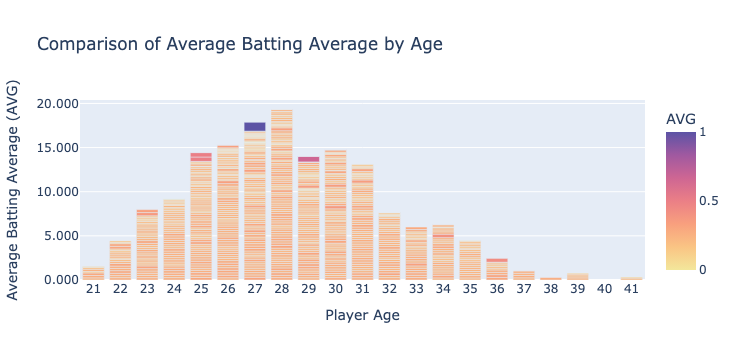

In [17]:
# Alternative: Use a bar chart if you want to color by Avg
fig = px.bar(
    DF_mlb,
    x='Age',
    y='AVG',
    title='Comparison of Average Batting Average by Age',
    labels={'Avg': 'Average Batting Average (AVG)', 'Age': 'Player Age'},
    color='AVG',  # Now color works as expected
    color_continuous_scale=px.colors.sequential.Sunset
)

# Customize the layout
fig.update_layout(
    xaxis={'tickmode': 'linear'}, # Ensures every age tick is shown
    yaxis_tickformat='.3f',        # Format AVG to 3 decimal places
    xaxis_title='Player Age',
    yaxis_title='Average Batting Average (AVG)'
)

# Display the plot
fig.show()

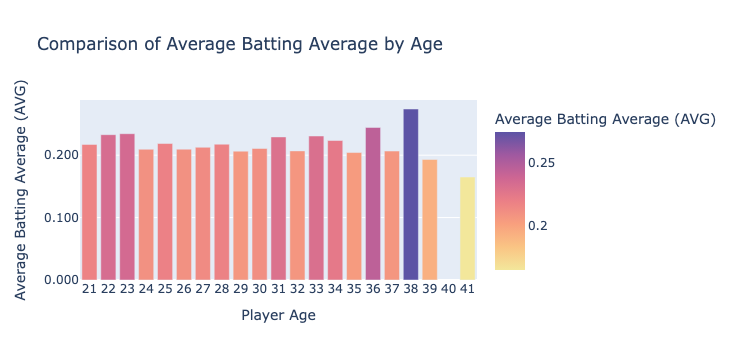

In [22]:
import pandas as pd
import plotly.express as px 

# --- 1. Load the CSV file and prepare data ---

# Load the MLB player statistics file
DF_mlb = pd.read_csv('mlb-player-stats-Batters.csv')

# Convert Batting Average (AVG) to numeric, handling errors
DF_mlb['AVG'] = pd.to_numeric(DF_mlb['AVG'], errors='coerce')

# Drop rows with missing Age or AVG for accurate grouping
DF_mlb = DF_mlb.dropna(subset=['Age', 'AVG'])

# Calculate the average Batting Average (AVG) for each unique Age
DF_avg_by_age = DF_mlb.groupby('Age')['AVG'].mean().reset_index()
DF_avg_by_age = DF_avg_by_age.rename(columns={'AVG': 'Average Batting Average'})

# --- 2. Create Interactive Bar Plot to Compare Averages by Age ---
fig = px.bar(
    DF_avg_by_age,
    x='Age',
    y='Average Batting Average',
    title='Comparison of Average Batting Average by Age',
    labels={'Average Batting Average': 'Average Batting Average (AVG)', 'Age': 'Player Age'},
    color='Average Batting Average',
    color_continuous_scale=px.colors.sequential.Sunset
)

# Customize the layout for clarity
fig.update_layout(
    xaxis={'tickmode': 'linear'}, 
    yaxis_tickformat='.3f',        
    xaxis_title='Player Age',
    yaxis_title='Average Batting Average (AVG)'
)

# Display the plot
fig.show()